Será utilizado uma base de dados relacionado à consumo de cerveja em SP e será treinada como uma regressão linear, afim de prever o consumo de cerveja em litros.

# Importação e Tratamento dos dados

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
beer = pd.read_csv('Consumo_cerveja.csv')

In [15]:
beer.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [16]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
Data                           365 non-null object
Temperatura Media (C)          365 non-null object
Temperatura Minima (C)         365 non-null object
Temperatura Maxima (C)         365 non-null object
Precipitacao (mm)              365 non-null object
Final de Semana                365 non-null float64
Consumo de cerveja (litros)    365 non-null float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [17]:
beer = beer.dropna()

In [18]:
beer.columns = beer.columns.str.replace(' ', '_')
beer.columns = beer.columns.str.replace('[)(]' ,'')

In [19]:
beer.columns

Index(['Data', 'Temperatura_Media_C', 'Temperatura_Minima_C',
       'Temperatura_Maxima_C', 'Precipitacao_mm', 'Final_de_Semana',
       'Consumo_de_cerveja_litros'],
      dtype='object')

In [20]:
beer['Temperatura_Media_C'] = beer['Temperatura_Media_C'].astype(str).str.replace(',','.').astype(float)
beer['Temperatura_Minima_C'] = beer['Temperatura_Minima_C'].astype(str).str.replace(',', '.').astype(float)
beer['Temperatura_Maxima_C'] = beer['Temperatura_Maxima_C'].astype(str).str.replace(',', '.').astype(float)
beer['Precipitacao_mm'] = beer['Precipitacao_mm'].astype(str).str.replace(',', '.').astype(float)

In [21]:
beer['Final_de_Semana'] = beer['Final_de_Semana'].astype(int)

In [22]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
Data                         365 non-null object
Temperatura_Media_C          365 non-null float64
Temperatura_Minima_C         365 non-null float64
Temperatura_Maxima_C         365 non-null float64
Precipitacao_mm              365 non-null float64
Final_de_Semana              365 non-null int32
Consumo_de_cerveja_litros    365 non-null float64
dtypes: float64(5), int32(1), object(1)
memory usage: 21.4+ KB


# Visualização dos dados 

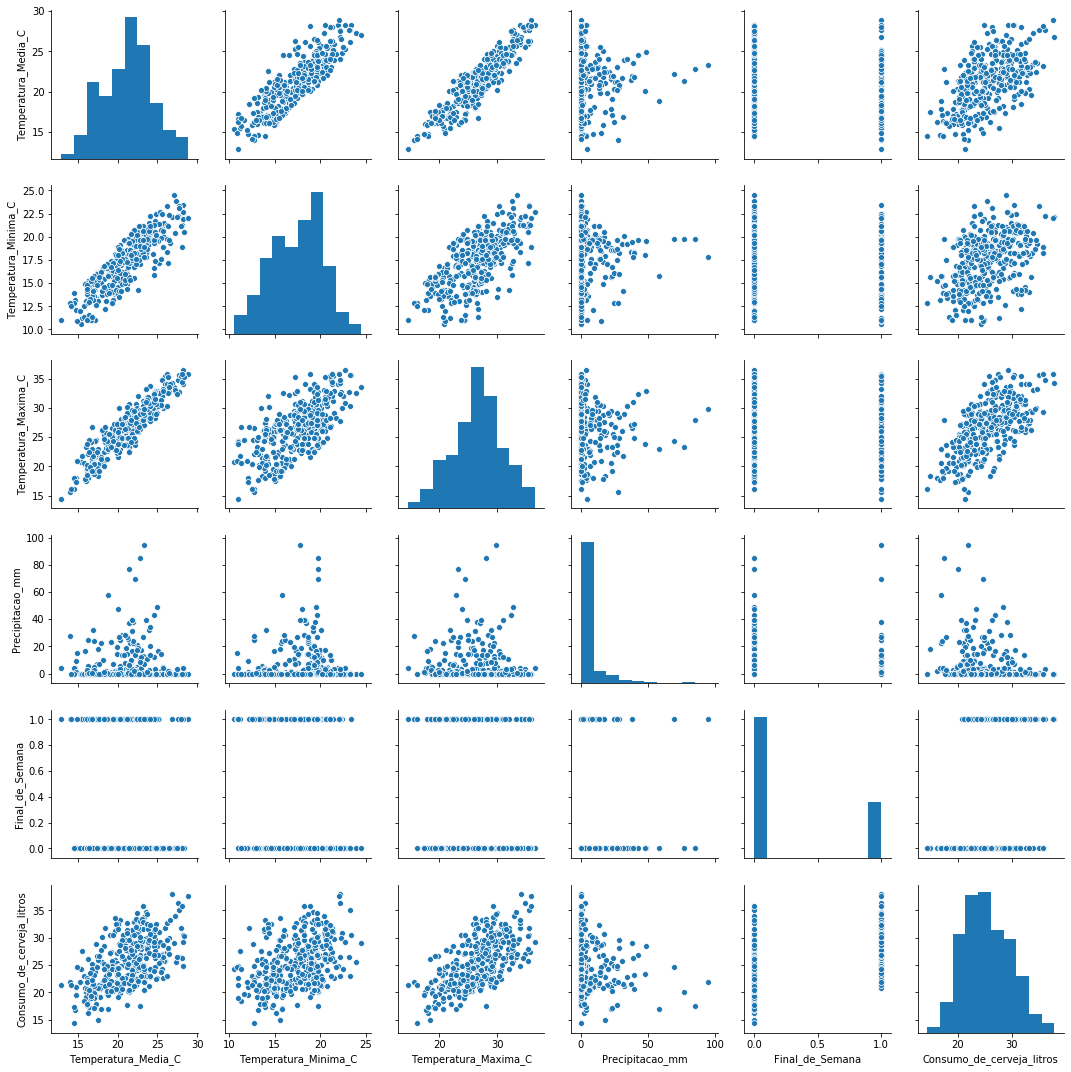

In [23]:
sns.pairplot(beer)

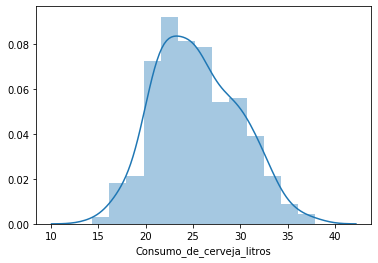

In [24]:
sns.distplot(beer['Consumo_de_cerveja_litros'])

Text(0.5, 0, '[0 - Dia de semana] [1 - Final de Semana]')

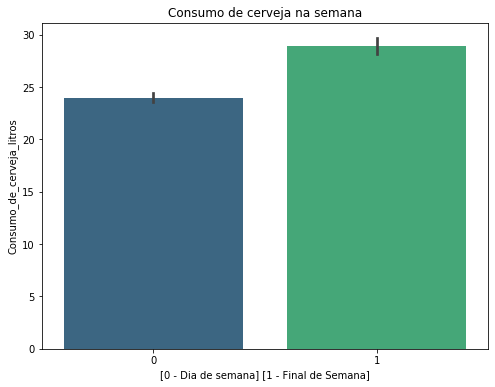

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'Final_de_Semana', y = 'Consumo_de_cerveja_litros', data = beer, palette = 'viridis')
plt.title("Consumo de cerveja na semana")
plt.xlabel("[0 - Dia de semana] [1 - Final de Semana]")

No gráfico acima dá para tirar a conclusão que as pessoas consomem mais cerveja em finais de semana.

In [26]:
beer["Data"]= pd.to_datetime(beer["Data"]) 
beer['Mes'] = pd.to_datetime(beer['Data']).dt.month

Text(0.5, 1.0, 'Consumo de cerveja por mês')

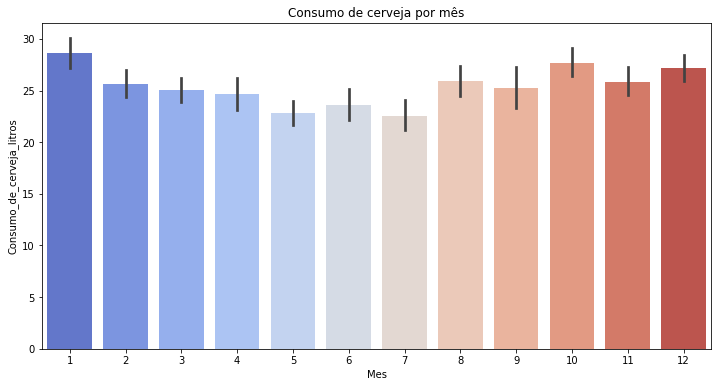

In [27]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Mes', y = 'Consumo_de_cerveja_litros', data = beer, palette = 'coolwarm')
plt.title('Consumo de cerveja por mês')

Janeiro é o mês que mais consomem cerveja e Julho é o mês que consomem menos.

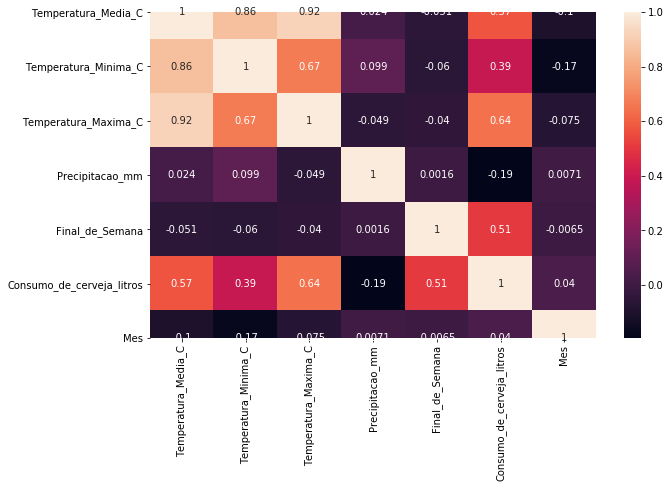

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(beer.corr(), annot=True)

No Pairplot e no Heatmap (gráfico acima), se percebe que os dados de Temperatura Mínima, Média, Máxima e Finais de Semana são os que mais se relacionam com o consumo de cerveja.

# Treinando os dados com Regressão Linear

In [29]:
X = beer[['Temperatura_Media_C', 'Temperatura_Minima_C', 'Temperatura_Maxima_C', 'Final_de_Semana']]
y = beer['Consumo_de_cerveja_litros']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [31]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 0.07206792 -0.14653365  0.68882738  5.12680598]


In [33]:
predictions = lm.predict(X_test)

Visualização da previsão x dados reais:

Text(0, 0.5, 'Predicted Y')

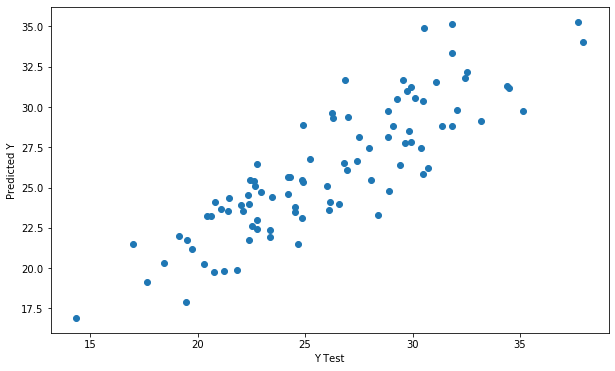

In [35]:
plt.figure(figsize = (10,6))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

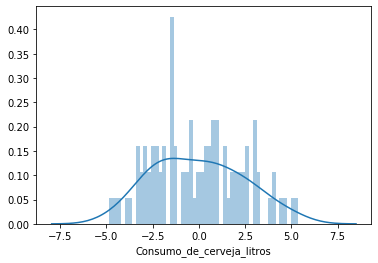

In [36]:
sns.distplot((y_test-predictions),bins=50)

Métricas para avaliação do modelo:

In [68]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.0349149908971778
MSE: 5.839582908594811
RMSE: 2.4165228963522796


In [69]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Temperatura_Media_C,0.072068
Temperatura_Minima_C,-0.146534
Temperatura_Maxima_C,0.688827
Final_de_Semana,5.126806
